In [1]:
import tensorflow as tf

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(320,240,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax'),
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 318, 238, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 159, 119, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 157, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 58, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 289536)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               148242944 
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [4]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        'C:\DSet\Train',  # This is the source directory for training images
        target_size=(320,240),  # All images will be resized to 320*240
        batch_size=64,
        class_mode='sparse')

validation_generator = validation_datagen.flow_from_directory(
        'C:\DSet\Validation',  
        target_size=(320,240), 
        batch_size=32,
        class_mode='sparse')

Found 2716 images belonging to 3 classes.
Found 612 images belonging to 3 classes.


In [6]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=5,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/5
8/8 [==============================] - 36s 4s/step - loss: 9.1237 - accuracy: 0.4570 - val_loss: 1.4185 - val_accuracy: 0.4727
Epoch 2/5
8/8 [==============================] - 38s 5s/step - loss: 0.6620 - accuracy: 0.7383 - val_loss: 0.2862 - val_accuracy: 0.9570
Epoch 3/5
8/8 [==============================] - 39s 5s/step - loss: 0.1126 - accuracy: 0.9668 - val_loss: 0.3592 - val_accuracy: 0.9414
Epoch 4/5
8/8 [==============================] - 38s 5s/step - loss: 0.0180 - accuracy: 0.9961 - val_loss: 0.4647 - val_accuracy: 0.9648
Epoch 5/5
8/8 [==============================] - 37s 5s/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.5699 - val_accuracy: 0.9609


Text(0.5, 1.0, 'Training and validation loss')

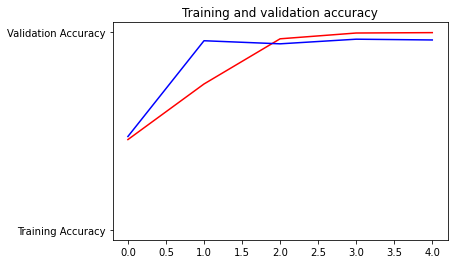

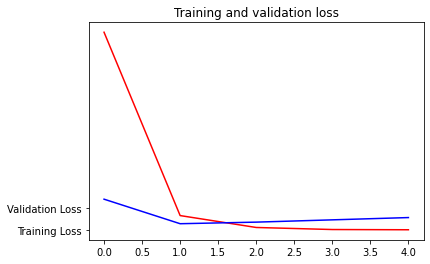

In [8]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')